![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 13 - Dimensionality Reduction</center>
### <center> Isomap</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/13_DimensionalityReduction/MainIsomap.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(2)

### Get data:
Download it from here:  
https://web.archive.org/web/20150922051706/http://isomap.stanford.edu/face_data.mat.Z

In [2]:
import scipy.io

mX     = scipy.io.loadmat('./face_data.mat')['images'].T
N, D   = mX.shape
vShape = (64, 64)
mX.shape

(698, 4096)

### Plot some examples:

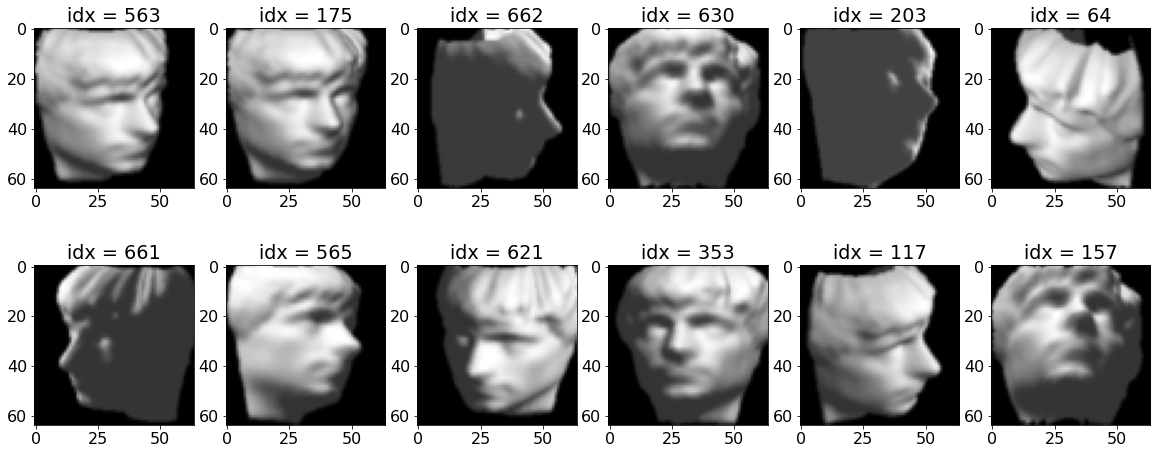

In [3]:
K = 12
fig, _ = plt.subplots(2, 6, figsize=(20, 8))
for kk, ax in zip(range(K), fig.axes):
    idx = np.random.choice(N)
    mI  = np.reshape(mX[idx,:], vShape).T
    
    ax.imshow(mI, cmap='gray')
    ax.set_title('idx = ' + str(idx))
plt.show()

### Apply Isomap:

In [4]:
from sklearn import manifold

isomap   = manifold.Isomap(n_neighbors=6, n_components=2, metric='l2').fit(mX)
mZ       = isomap.transform(mX)
mZ.shape

(698, 2)

### 2D plot:

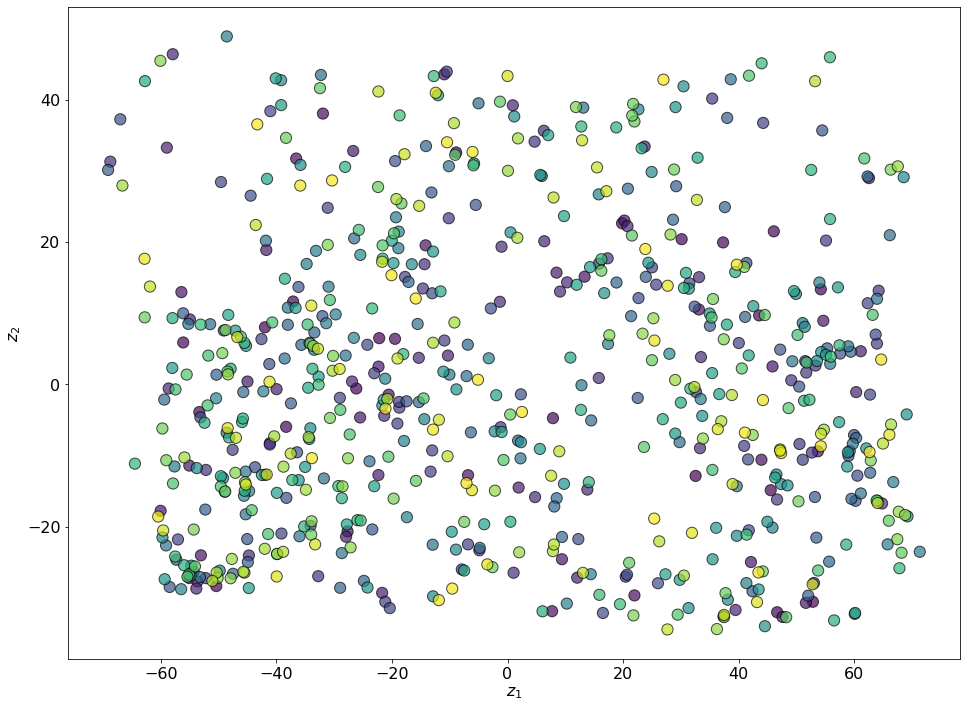

In [5]:
fig = plt.figure(figsize=(16,12))
plt.scatter(mZ[:,0], mZ[:,1], s=500, c=range(N), marker='.',alpha=0.7, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.show()

In [6]:
#-- Flipping the second axis:
mZ[:,1] *= -1

### Compute the farthest points:
(Just for plotting)

In [7]:
import scipy as sp

lSet = list(range(1, N))
lIdx = [0]
for ii in range(N-1):
    mDi  = sp.spatial.distance.cdist(mZ[lIdx,:], mZ[lSet,:])
    vMin = np.min(mDi, axis=0)
    idx  = np.argmax(vMin)
    lIdx.append(lSet[idx])
    lSet.remove(lSet[idx])

### Plot with images:

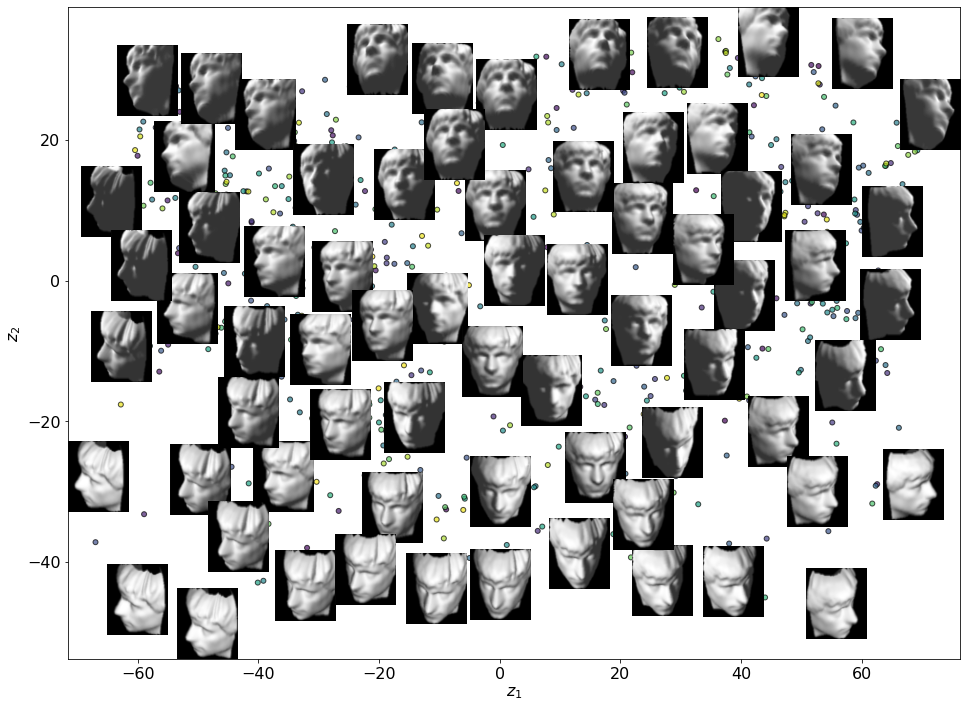

In [8]:
fig = plt.figure(figsize=(16,12))

size = 5
for ii in range(70):
    idx = lIdx[ii]
    x0  = mZ[idx,0] - size
    x1  = mZ[idx,0] + size
    y0  = mZ[idx,1] - size
    y1  = mZ[idx,1] + size
    mI  = np.reshape(mX[idx,:], vShape).T
    plt.imshow(mI, aspect='auto', cmap='gray', zorder=1, extent=(x0, x1, y0, y1))

plt.scatter(mZ[:,0], mZ[:,1], s=100, c=range(N), marker='.',alpha=0.7, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
    
plt.show()